In [1]:
from google.colab import files
x = files.upload()

Saving DataSetSplitted.zip to DataSetSplitted.zip


In [2]:
! unzip DataSetSplitted.zip

Archive:  DataSetSplitted.zip
   creating: DataSet/
   creating: DataSet/test/
   creating: DataSet/test/human/
  inflating: DataSet/test/human/Angelina-Jolie-100x130cm-2013.jpg  
  inflating: DataSet/test/human/b53d30e509b44bfc5f7bf3d3a03cc000fcd50623.jpeg  
  inflating: DataSet/test/human/dam-images-daily-2014-11-martin-schoeller-portraits-martin-schoeller-portraits-02.jpg  
  inflating: DataSet/test/human/default.jpg  
  inflating: DataSet/test/human/image24.jpeg  
  inflating: DataSet/test/human/image32.jpeg  
  inflating: DataSet/test/human/image33.jpeg  
  inflating: DataSet/test/human/images102.jpg  
  inflating: DataSet/test/human/images113.jpg  
  inflating: DataSet/test/human/images114.jpg  
  inflating: DataSet/test/human/images147.jpg  
  inflating: DataSet/test/human/images148.jpg  
  inflating: DataSet/test/human/images149.jpg  
  inflating: DataSet/test/human/images184.jpg  
  inflating: DataSet/test/human/images185.jpg  
  inflating: DataSet/test/human/images193.jpg  
 

In [3]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = my_generator.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
valid_generator = my_generator.flow_from_directory( './DataSet/validate/', target_size=(150, 150), batch_size=4, class_mode='binary')
test_generator = my_generator.flow_from_directory('./DataSet/test/', target_size=(150, 150), batch_size=4, class_mode='binary')

Found 738 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [6]:
augmentedImageGenerator1 = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.35,
    height_shift_range=0.35,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')

In [7]:
# Generator for training dataset
augmentedTrain1 = augmentedImageGenerator1.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
# Generator for validation dataset
valid_generator = my_generator.flow_from_directory( './DataSet/validate/', target_size=(150, 150), batch_size=4, class_mode='binary')
# We may need to create another generator for the test dataset
# ??
test_generator = my_generator.flow_from_directory('./DataSet/test/', target_size=(150, 150), batch_size=4, class_mode='binary')

Found 738 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [8]:
EPOCHS = 100
checkpoint_filepath = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_loss', verbose=1,mode='min',save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)
model = Sequential()
model.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( BatchNormalization())
model.add( MaxPooling2D(4 ,4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( BatchNormalization())
model.add( MaxPooling2D(4, 4) )
model.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model.add( BatchNormalization())
model.add( Flatten() )
model.add( Dense( 10, activation = 'relu' ) )
model.add( Dense( 1, activation = 'sigmoid' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 batch_normalization_1 (Batc  (None, 35, 35, 16)       64        
 hNormalization)                                                 
                                                        

In [9]:
model.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( augmentedTrain1, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=[checkpoint,earlystopping])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - ETA: 0s - loss: 0.6001 - accuracy: 0.7276
Epoch 1: val_loss improved from inf to 0.87551, saving model to best.h5
185/185 [==============================] - 32s 163ms/step - loss: 0.6001 - accuracy: 0.7276 - val_loss: 0.8755 - val_accuracy: 0.5064
Epoch 2/100
185/185 [==============================] - ETA: 0s - loss: 0.4945 - accuracy: 0.7791
Epoch 2: val_loss did not improve from 0.87551
185/185 [==============================] - 30s 160ms/step - loss: 0.4945 - accuracy: 0.7791 - val_loss: 1.1842 - val_accuracy: 0.5064
Epoch 3/100
185/185 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.7493
Epoch 3: val_loss improved from 0.87551 to 0.77752, saving model to best.h5
185/185 [==============================] - 30s 160ms/step - loss: 0.5315 - accuracy: 0.7493 - val_loss: 0.7775 - val_accuracy: 0.5705
Epoch 4/100
185/185 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.7778
Epoch 4: val_loss improved 

In [10]:
model.load_weights('best.h5')
model.evaluate(test_generator)

 3/36 [=>............................] - ETA: 2s - loss: 0.5121 - accuracy: 0.8333

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 4s 100ms/step - loss: 0.2587 - accuracy: 0.9167


[0.25868523120880127, 0.9166666865348816]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

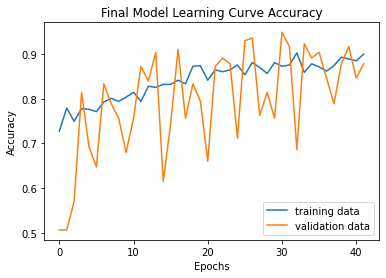

In [16]:
print(history.history.keys())
keyList = list(history.history.keys())
plt.plot(history.history[keyList[1]],label = "Training accuracy" )
plt.plot(history.history[keyList[3]], label = "Validation accuracy" )
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("Final Model Learning Curve Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

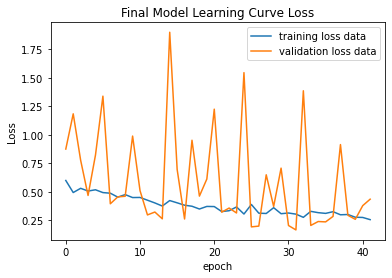

In [12]:
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Final Model Learning Curve Loss")
plt.legend(['training loss data', 'validation loss data'], loc='upper right')
plt.show()

In [13]:
%%shell
jupyter nbconvert --to html /content/Final_Phase.ipynb

[NbConvertApp] Converting notebook /content/Final_Phase.ipynb to html
[NbConvertApp] Writing 432297 bytes to /content/Final_Phase.html
